In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
D0 = 1e8
dQ = 284000
T = 900 + 273
R = 8.3145
D = D0 * np.exp(-dQ/(R*T))  #value of constant d in micro metres squared per second 
D

2.257115469408825e-05

In [3]:
def I(x):
    sigma = 0.02 #10^-6m 
    M1 = 0.02 #10^-6 m 
    M2 = 0.8  #10^-6m 
    
    #exponents 
    exp1 = (x-M1)**2/(2*(sigma**2))
    exp2 = (x-M2)**2/(2*(sigma**2))
    exp3 = 1/(1.0000001-((2*x)-1)**2)
    
    C = (1/np.sqrt(2*np.pi*sigma))*(np.exp(-exp1)+np.exp(-exp2))*np.exp(-exp3)
    return C

In [4]:
I(1)

0.0

Text(0.5, 1.0, 'composition against distance at time=0')

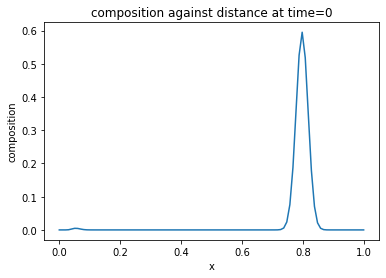

In [5]:
x = np.linspace(0,1,100)
plt.plot(x, I(x))
plt.xlabel('x')
plt.ylabel('composition')
plt.title('composition against distance at time=0')

0.22571154694088247


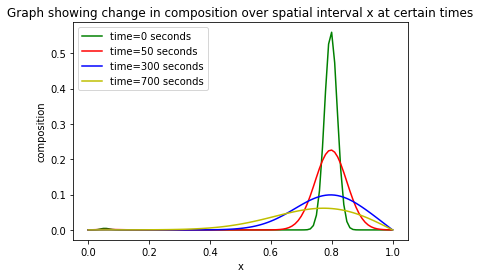

In [8]:
L=1      #max length in x direction 
Nx=100   #number of x points 
T=700    #length of time in seconds
Nt=700   #number of time points 


x = np.linspace(0, L, Nx+1)    #create range of x data points 
dx = x[1] - x[0]     #dx = 0.01 as required 

t = np.linspace(0, T, Nt+1)    #create range of time data points 
dt = t[1] - t[0]     #dt = 1 as required 

F = D*dt/dx**2      #D is diffusion constant calculated above 
print(F)

c   = np.zeros(Nx+1)           # unknown composition c at certain time
c_n = np.zeros(Nx+1)           # unknown composition c at previous time


# Set initial condition (time=0), c(x,0) = I(x)
#i refers to the loop through the x coordinates 
for i in range(0, Nx+1):
    c_n[i] = I(x[i])

#n refers to loop through the time coordinates 
for n in range(0, Nt):
    # Compute c at each time for the whole range of x coordinates 
    for i in range(1, Nx):
        #FDM equation 
        c[i] = c_n[i] + F*(c_n[i-1] - 2*c_n[i] + c_n[i+1])

    #if time (n) equals certain times then plot the graph  
    if n == 50:
        #print(np.array(u[i]))
        plt.plot(x,c, c='r', label='time=50 seconds')
    if n == 300: 
        plt.plot(x, c, c='b',label='time=300 seconds')
    if n ==0: 
        plt.plot(x, c, c='g',label='time=0 seconds')
    if n == 699:
        plt.plot(x, c, c='y',label='time=700 seconds')
    
    #plotting graphs 
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('composition')
    plt.title('Graph showing change in composition over spatial interval x at certain times')

    # Update c_n before next step
    c_n[:]= c